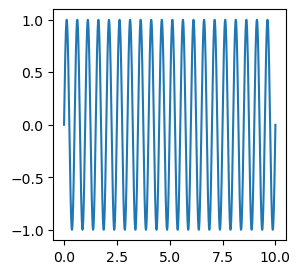

In [1]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (3,3)
plt.rcParams['figure.dpi'] = 100

SAMPLE_RATE = 44100  # Hertz
DURATION = 10  # Seconds

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

# Generate a 2 hertz sine wave that lasts for 5 seconds
x, y = generate_sine_wave(2, SAMPLE_RATE, DURATION)
plt.plot(x, y)
plt.show()

In [2]:
_, first_tone = generate_sine_wave(400, SAMPLE_RATE, DURATION)
t, second_tone = generate_sine_wave(440, SAMPLE_RATE, DURATION)
mixed_tone = first_tone + second_tone

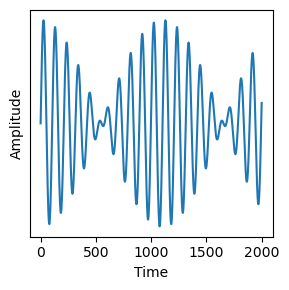

In [3]:
normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.yticks([])

plt.plot(normalized_tone[:2000])
plt.tight_layout()
plt.savefig('toy_orig_t.png', bbox_inches='tight')

plt.show()

In [4]:
import datetime
import numpy as np
import scipy as sp
import scipy.fftpack
import pandas as pd

df_fft = scipy.fftpack.fft(normalized_tone)

In [5]:
N = len(normalized_tone)
yf = sp.fftpack.fft(normalized_tone)
xf = sp.fftpack.fftfreq(N, 1 / SAMPLE_RATE)

In [6]:
yf = yf/len(yf)
df_psd = np.abs(yf) ** 2
df_psd = df_psd/sum(df_psd) ** 0.5

In [7]:
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.yticks([])

plt.plot(xf, np.abs(yf))
plt.show()

In [8]:
fig, ax = plt.subplots(1, 1)

ax.set_xlim(0, 500)
#ax.set_ylim(0, 8500)
ax.set_xlabel('Frequency')
ax.set_ylabel('Amplitude')
ax.set_yticks([])

ax.plot(xf, np.abs(yf))
plt.tight_layout()
plt.savefig('toy_orig_f.png', bbox_inches='tight')

plt.show()

In [9]:
original = sp.fftpack.ifft(df_fft)

/Users/liuv/opt/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


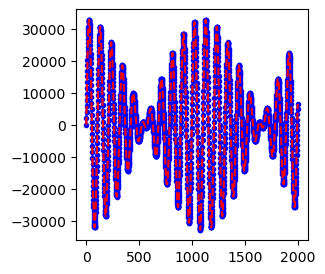

In [10]:
plt.plot( normalized_tone[:2000], 'b.-')
plt.plot(original[:2000], 'r--')
plt.show()

## sample at close to nyquist

In [11]:
len(normalized_tone)

441000

In [12]:
from scipy import signal
normalized_tone_sampled = signal.resample(normalized_tone, 8900)

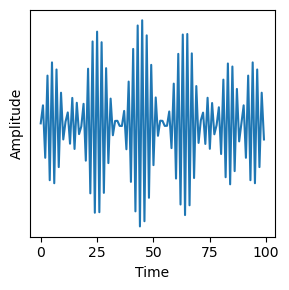

In [13]:
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.yticks([])

plt.plot(normalized_tone_sampled[:100])
plt.tight_layout()
plt.savefig('toy_nyquist_t.png', bbox_inches='tight')

plt.show()

In [14]:
import datetime
import numpy as np
import scipy as sp
import scipy.fftpack
import pandas as pd
df_fft = scipy.fftpack.fft(normalized_tone_sampled)

In [15]:

yf_2 = sp.fftpack.fft(normalized_tone_sampled)
xf_2 = sp.fftpack.fftfreq(8900, 1 / 890)

In [16]:
yf_2 = yf_2/len(yf_2)
df_psd_2 = np.abs(yf_2) ** 2
df_psd_2 = df_psd_2/sum(df_psd_2) ** 0.5

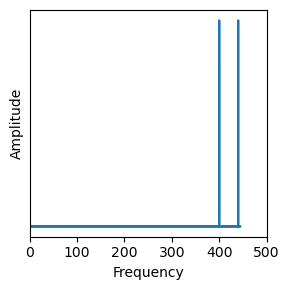

In [17]:
fig, ax = plt.subplots(1, 1)

ax.set_xlim(0, 500)
ax.set_xlabel('Frequency')
ax.set_ylabel('Amplitude')
ax.set_yticks([])

plt.plot(xf_2, np.abs(yf_2))
plt.tight_layout()
plt.savefig('toy_nyquist_f.png', bbox_inches='tight')

plt.show()

In [18]:
difference = 0
total_energy = 0
i = 0
j = 0
while i < len(xf) and j < len(xf_2):
    if xf[i] == xf_2[j]:
        difference += np.abs(df_psd[i] - df_psd_2[j])
        total_energy += np.abs(df_psd[i])
        i += 1
        j += 1
        continue
    if xf[i] > xf_2[j]:
        j += 1
        continue
    if xf[i] < xf_2[j]:
        i += 1
print(difference)
print(total_energy)

2.3513839552332534e-06
8215.00098599061


In [19]:
original = sp.fftpack.ifft(yf)

/Users/liuv/opt/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


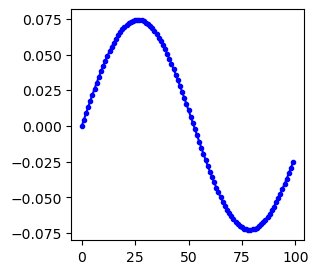

In [20]:
plt.plot(original[:100], 'b.-')
plt.show()

## sample at below nyquist

In [21]:
from scipy import signal
normalized_tone = signal.resample(normalized_tone, 8000)

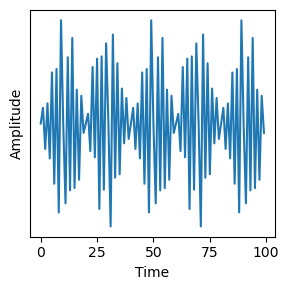

In [22]:
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.yticks([])

plt.plot(normalized_tone[:100])
plt.tight_layout()
plt.savefig('toy_low_t.png', bbox_inches='tight')

plt.show()

In [23]:
import datetime
import numpy as np
import scipy as sp
import scipy.fftpack
import pandas as pd
df_fft = scipy.fftpack.fft(normalized_tone)

In [24]:

yf_3 = sp.fftpack.fft(normalized_tone)
xf_3 = sp.fftpack.fftfreq(8000, 1 / 800)

In [25]:
fig, ax = plt.subplots(1, 1)

ax.set_xlim(0, 500)
ax.set_xlabel('Frequency')
ax.set_ylabel('Amplitude')
ax.set_yticks([])

plt.plot(xf_3, np.abs(yf_3))
plt.tight_layout()
plt.savefig('toy_low_f.png', bbox_inches='tight')

plt.show()

In [26]:
yf_3 = yf_3/len(yf_3)
df_psd_3 = np.abs(yf_3) ** 2
df_psd_3 = df_psd_3/sum(df_psd_3) ** 0.5

In [27]:
difference = 0
total_energy = 0
i = 0
j = 0
while i < len(xf) and j < len(xf_3):
    if xf[i] == xf_3[j]:
        difference += np.abs(df_psd[i] - df_psd_3[j])
        total_energy += np.abs(df_psd[i])
        i += 1
        j += 1
        continue
    if xf[i] > xf_3[j]:
        j += 1
        continue
    if xf[i] < xf_3[j]:
        i += 1
print(difference)
print(total_energy)

0.06017926963842761
4.408517465630364e-07


## sample way below nyquist

In [28]:
from scipy import signal
normalized_tone = signal.resample(normalized_tone, 6000)

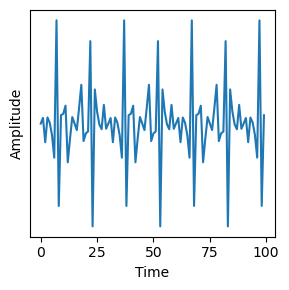

In [29]:
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.yticks([])

plt.plot(normalized_tone[:100])
plt.tight_layout()
plt.savefig('toy_vlow_t.png', bbox_inches='tight')

plt.show()

In [30]:
import datetime
import numpy as np
import scipy as sp
import scipy.fftpack
import pandas as pd
df_fft = scipy.fftpack.fft(normalized_tone)

In [31]:

yf_4 = sp.fftpack.fft(normalized_tone)
xf_4 = sp.fftpack.fftfreq(6000, 1 / 600)

In [32]:
fig, ax = plt.subplots(1, 1)

ax.set_xlim(0, 500)
ax.set_xlabel('Frequency')
ax.set_ylabel('Amplitude')
ax.set_yticks([])

plt.plot(xf_4, np.abs(yf_4))
plt.tight_layout()
plt.savefig('toy_vlow_f.png', bbox_inches='tight')

plt.show()

In [33]:
yf_4 = yf_4/len(yf_4)
df_psd_4 = np.abs(yf_4) ** 2
df_psd_4 = df_psd_4/sum(df_psd_4) ** 0.5

In [34]:
difference = 0
total_energy = 0
i = 0
j = 0
while i < len(xf) and j < len(xf_4):
    if xf[i] == xf_4[j]:
        difference += np.abs(df_psd[i] - df_psd_4[j])
        total_energy += np.abs(df_psd[i])
        i += 1
        j += 1
        continue
    if xf[i] > xf_4[j]:
        j += 1
        continue
    if xf[i] < xf_4[j]:
        i += 1
print(difference)
print(total_energy)

0.023096750460502
6.493765219920478e-08
